In [1]:
%matplotlib notebook

from cv2 import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(x, cmap=plt.cm.gray):
    dpi = 32
    print(x.shape)
    #plt.figure(figsize=(x.shape[0]/dpi, x.shape[1]/dpi), dpi=dpi)
    plt.figure(figsize=(25, 25), dpi=dpi)
    plt.imshow(x, cmap=cmap)
    #fig.figimage(x, cmap=plt.cm.gray)
    plt.show()

(256, 256)


<IPython.core.display.Javascript object>


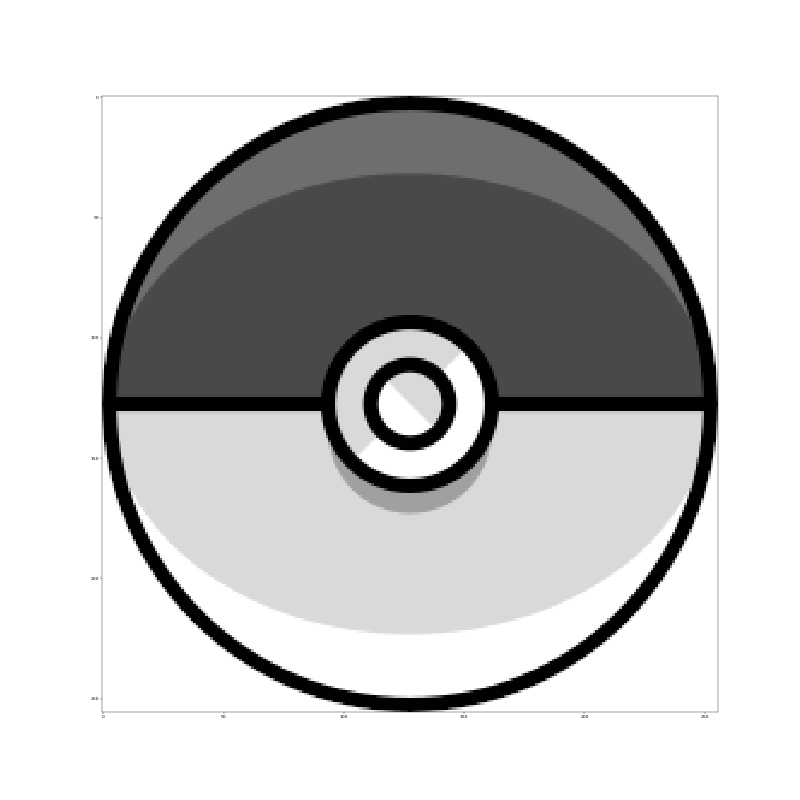

In [2]:
raw = cv2.imread("./pokeball.png", cv2.IMREAD_GRAYSCALE)
raw_ = cv2.resize(raw, (1024, 1024), interpolation=cv2.INTER_CUBIC)
show(raw)

255.0
(256, 256)


<IPython.core.display.Javascript object>


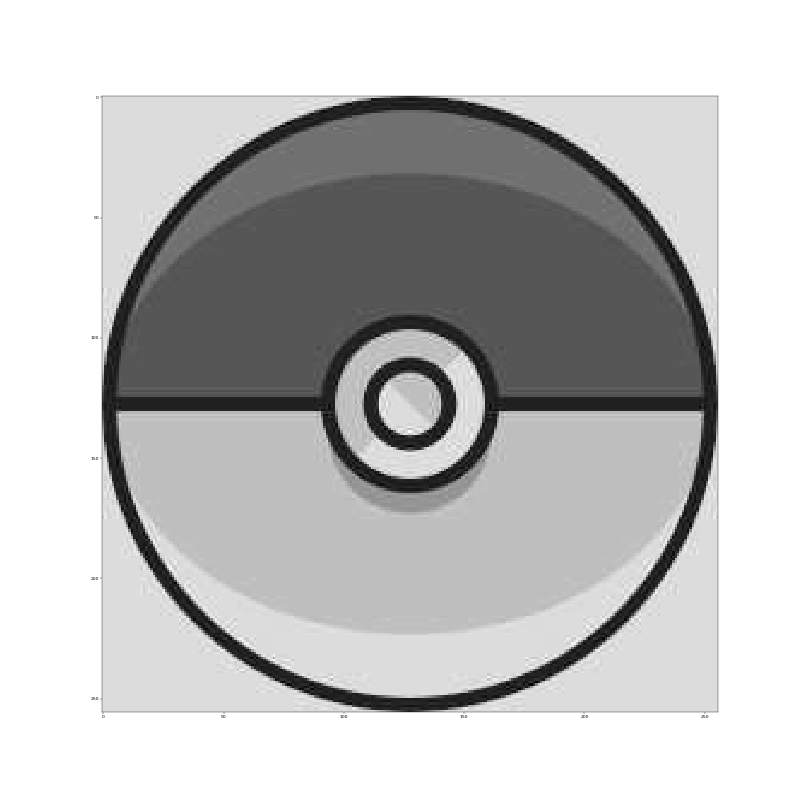

In [3]:
#Width and height of x must be the mutiple of 8
def jpeg_gray(x):
    output = np.zeros(x.shape, dtype=int)
    w = x.shape[0]
    h = x.shape[1]
    
    quantization_table = np.array([
        [16, 11, 10, 16,  24,  40,  51,  61],
        [12, 12, 14, 19,  26,  58,  60,  55],
        [14, 13, 16, 24,  40,  57,  69,  56],
        [14, 17, 22, 29,  51,  87,  80,  62],
        [18, 22, 37, 56,  68, 109, 103,  77],
        [24, 36, 55, 64,  81, 104, 113,  92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103,  99]
    ])
    
    for i in range(0, h, 8):
        for j in range(0, w, 8):
            sample = x[j:j+8, i:i+8]
            dct = np.around(cv2.dct(sample.astype(float)))
            dct_quant = np.around(np.divide(dct, quantization_table))
            scaled_quant = np.multiply(dct_quant, quantization_table)
            out_block = np.around(cv2.idct(scaled_quant))
            output[j:j+8, i:i+8] = out_block
            
    output = output/np.amax(output)*255
    print(np.amax(output))
    return output.astype(np.uint8)

jpg = jpeg_gray(raw)
show(jpg)

(256, 256)


<IPython.core.display.Javascript object>


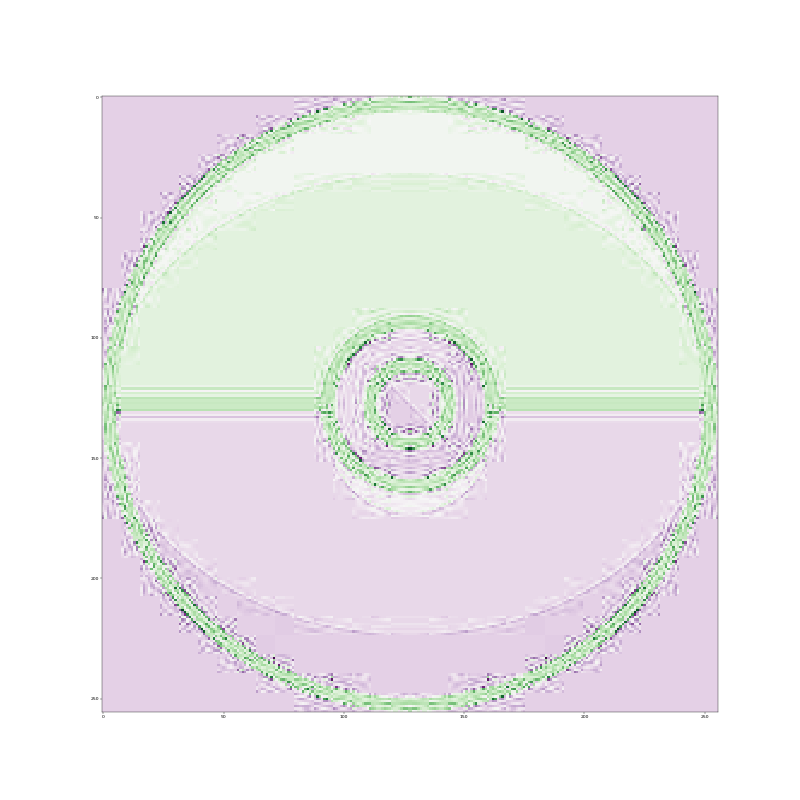

In [140]:
show(jpg.astype(int)-raw ,cmap=plt.cm.PRGn)

(256, 256)


<IPython.core.display.Javascript object>


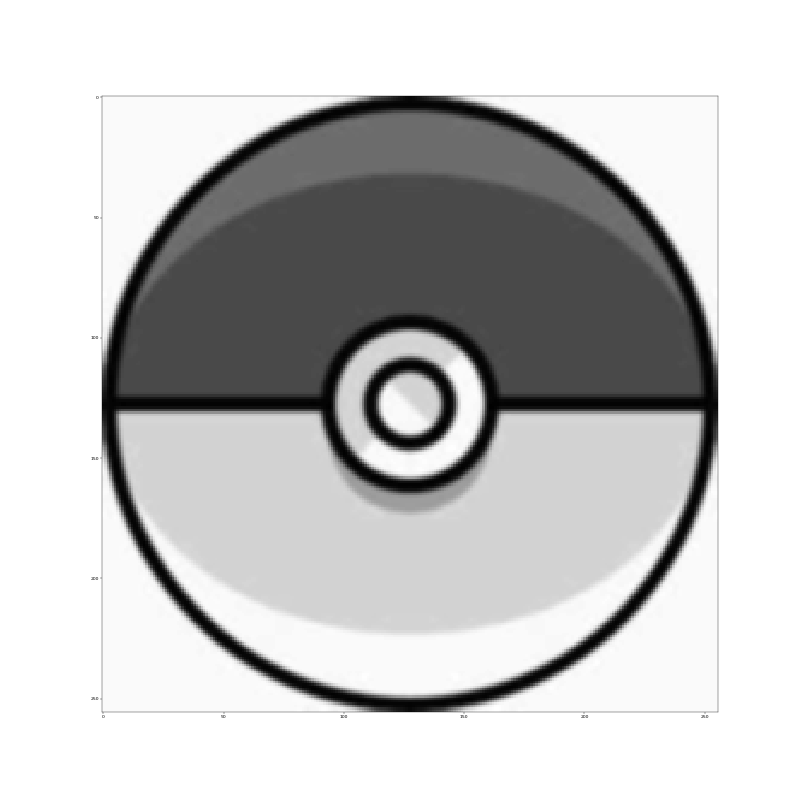

In [4]:
jpg_guassian = cv2.GaussianBlur(jpg, (5, 5), 0)
show(jpg_guassian)

(256, 256)


<IPython.core.display.Javascript object>


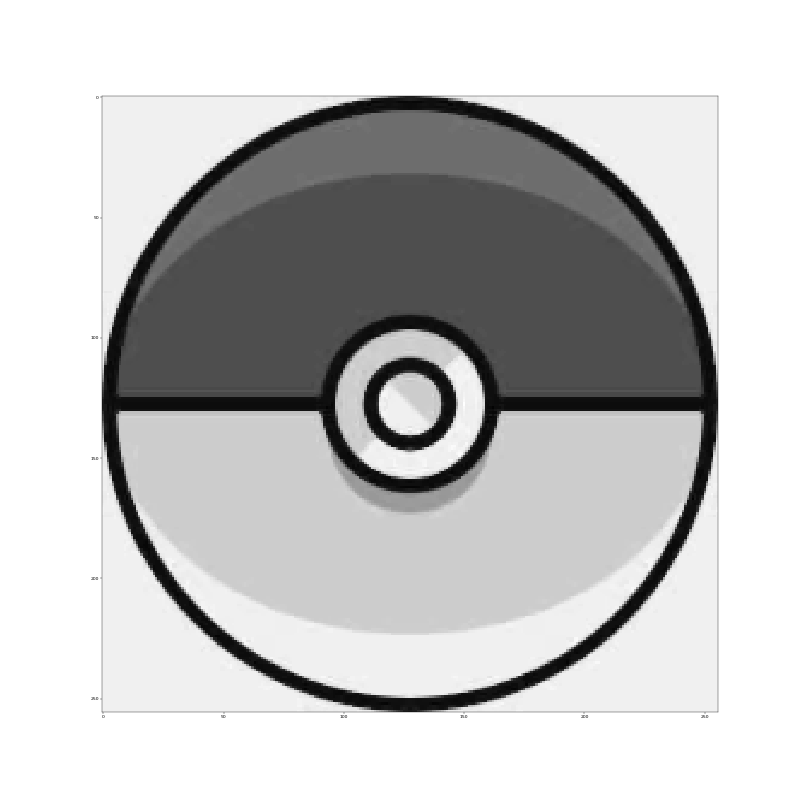

In [5]:
jpg_median = cv2.medianBlur(jpg,3)
show(jpg_median)